In [7]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [8]:
# Import the numpy and pandas packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as datetime

### Task 1: Import data

Import and read the uber database. Store it in a variable called uber.

In [9]:
# Read data from excel file

uber = pd.read_csv("D:\\E share\\DS\\Exploratory Data Analysis\\Assignment\\Uber Request Data.csv")

In [10]:
uber.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
Request id           6745 non-null int64
Pickup point         6745 non-null object
Driver id            4095 non-null float64
Status               6745 non-null object
Request timestamp    6745 non-null object
Drop timestamp       2831 non-null object
dtypes: float64(1), int64(1), object(4)
memory usage: 316.2+ KB


In [11]:
uber.shape

(6745, 6)

In [12]:
uber.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47


### Task 2: Convert data into standard format

In [13]:
# Convert 'Request itmestamp' and 'Drop timestamp' columns to date time format and also convert driver id from float to int

uber['Request timestamp'] = uber['Request timestamp'].apply(lambda x: pd.to_datetime(x, format='%d-%m-%Y %H:%M:%S', infer_datetime_format = True))
uber['Drop timestamp'] = uber['Drop timestamp'].apply(lambda x: pd.to_datetime(x, format='%d-%m-%Y %H:%M:%S', infer_datetime_format = True))
pd.options.display.float_format = '{:,.0f}'.format

In [14]:
# Extract the date and time from Request timestamp
uber['Request date'] = [datetime.datetime.date(d) for d in uber['Request timestamp']]
uber['Request time'] = [datetime.datetime.time(d) for d in uber['Request timestamp']]

In [15]:
#Add a column to get the time of the day when the requests are made

uber['Time of day']= np.where((uber['Request time'] >= datetime.time(0,0,0)) & (uber['Request time'] < datetime.time(6,0,0)), 'Early Morning', 
        (np.where((uber['Request time'] >= datetime.time(6,0,0)) & (uber['Request time'] < datetime.time(12,0,0)), 'Morning', 
                          (np.where((uber['Request time'] >= datetime.time(12,0,0)) & (uber['Request time'] < datetime.time(18,0,0)), 'Evening', 
                                       (np.where((uber['Request time'] >= datetime.time(18,0,0)) & (uber['Request time'] < datetime.time(23,59,59)), 'Night',
                                                          'Invalid')))))))

In [16]:
# Add a column to get the hour where the requests are made

uber['Hour'] = uber['Request timestamp'].dt.hour

In [17]:
uber.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 10 columns):
Request id           6745 non-null int64
Pickup point         6745 non-null object
Driver id            4095 non-null float64
Status               6745 non-null object
Request timestamp    6745 non-null datetime64[ns]
Drop timestamp       2831 non-null datetime64[ns]
Request date         6745 non-null object
Request time         6745 non-null object
Time of day          6745 non-null object
Hour                 6745 non-null int64
dtypes: datetime64[ns](2), float64(1), int64(2), object(5)
memory usage: 527.0+ KB


### Task 3:  Visual Analysis of data

In [18]:
group_status = uber.groupby('Status')
group_status

In [19]:
count_status = group_status['Status'].count()
count_status

Status
Cancelled            1264
No Cars Available    2650
Trip Completed       2831
Name: Status, dtype: int64

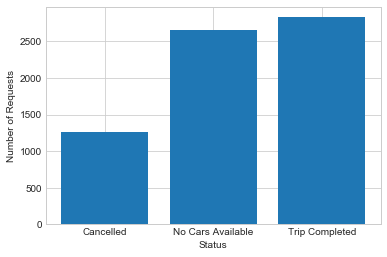

In [20]:
# Plot a graph to see the number of requests and their status

y_pos = np.arange(len(count_status))
Labels = ['Cancelled','No Cars Available','Trip Completed']
plt.bar(y_pos, count_status, align='center')
plt.xticks(y_pos, Labels)
plt.ylabel('Number of Requests')
plt.xlabel('Status')
plt.show()

#Bar plot has been plotted for easier readability

In [21]:
# Extract only the incomplete requests

uber_failed_status = uber[uber['Status'] !='Trip Completed']

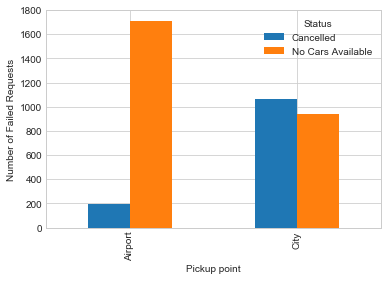

In [22]:
# Plot a graph to see where there are most number of incomplete requests

uber_failed_status.pivot_table(values = 'Request id',index = 'Pickup point', columns = 'Status', aggfunc ='count').plot(kind = 'bar')
plt.ylabel("Number of Failed Requests")
plt.xlabel("Pickup point")
plt.show()

# Bar plot has been plotted from a pivot table, 
# so that there is a clear cut difference shown with respect to Airport and City failed requests

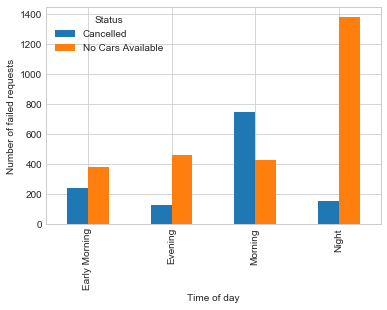

In [23]:
# Plot agraph to see in which part of the day there are maximum number of incomplete requests

uber_failed_status.pivot_table(values = 'Request id',index = 'Time of day', columns = 'Status', aggfunc ='count').plot(kind='bar')
plt.ylabel("Number of failed requests")
plt.xlabel("Time of day")
plt.show()

# Bar plot with a pivot_table is plotted o show the number of incomplete supply during differnet times of the day.

In [24]:
# Extract the requests which is complete

uber_passed_status = uber[uber['Status'] =='Trip Completed']

In [25]:
demand_hour = uber.groupby('Hour')['Status'].count()
supply_hour = uber_passed_status.groupby('Hour')['Status'].count()

In [26]:
# Find the difference(gap) between the supply and demand of uber cabs, hour-wise

gap_hour = demand_hour- supply_hour
gap_hour = gap_hour.to_frame()

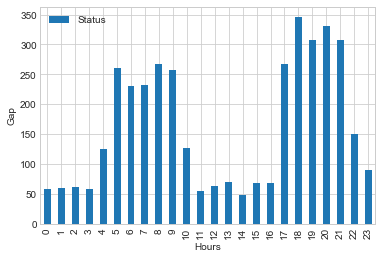

In [44]:
# Plot a graph to depict the gap in supply and demand on an hourly basis

gap_hour.pivot_table(values = 'Status',index = 'Hour').plot(kind='bar')
plt.ylabel('Gap')
plt.xlabel('Hours')
plt.show()

# Bar plots for easy readbility

In [28]:
demand_gap_type = (uber.groupby(['Hour','Pickup point'])['Status'].count()
                   -uber_passed_status.groupby(['Hour','Pickup point'])['Status'].count()).to_frame()

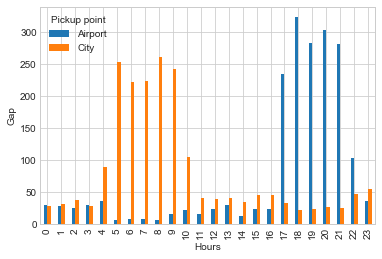

In [29]:
# Plot a graph to depict the gap in requests, hour- wise, and in which pickup points.

demand_gap_type.pivot_table(values= 'Status', index = 'Hour', columns = 'Pickup point').plot(kind='bar')
plt.ylabel('Gap')
plt.xlabel('Hours')
plt.show()

# Bar Plot to show which pickup oint has a supply problem and uring which time of the day.